# Workshop : introduction to machine learning <br> Lesson 1 : linear regression and classification

Colab link can be found here : https://colab.research.google.com/drive/1P63PKsiyvjfn_waqwrGvPL8az8Ai4XvZ
## I - Introduction to machine learning

Today machine learning is talked about all over the news. It has become widely famous in 2016 when Alpha Go, Google Deepmind's AI, has managed to win against the best player in Go of the world.

![Alpha Go against Lee Se-dol](https://media.wired.com/photos/592720e2cefba457b079c319/master/w_2400,c_limit/GW20160133774.jpg)
<i>Lee Se-Dol versus Alpha Go in 2016</i>

It is today one of the hottest topic, and it still manages to impress us every day, whether it is used in medecine, image recognition, or even content generation.

We can see here another achievement of AI : being able to transform a zebra into an horse in a picture and vice-versa : 

![Cycle Gan](https://cdn0.tnwcdn.com/wp-content/blogs.dir/1/files/2017/04/Screen-Shot-2017-04-19-at-12.41.26-796x371.png)
<i>Cycle GAN turning an horse into a zebra</i>

But the question that arises then is : what is machine learning ?

## II - The root of all machine learning : the regression task

### A simple principle

To explain how it works, we can simply say that the machine learning is simply the act of making a machine learn how to do something, rather than code with if and else how the machine should behave.

So in general, a machine learning setup is where we have **observations**, which are used to predict a **target**, and the performance of the machine is given by a **metric**.

### The theory

More formally, suppose we have a dataset $X = (x_1,...x_n)$ with each $x_i \in \mathbb{R}^p$. Here each $x_i$ represents an observation, it can be a row in a database, an individual, or a signal, and it has $p$ features. For instance for a person it can be her age, sex, location, etc ... Here we thus have that $X \in \mathbb{R}^{n * p}$
 
 We also usually have a target $y = (y_1,...,y_n)$ which is often called the **dependent variable** . For instance it could be the rating for a credit agency that an insurance company has.
 
 The goal in machine learning is to find a function $f : \mathbb{R}^p \rightarrow \mathcal{Y}$, such that for all observation $x_i$, we have that $\hat{y_i} = f(x_i) = y_i$.
 
 Here $\hat{y_i}$ is called the prediction. Therefore our objective here is to find a function $f$ that is able to predict $y_i$ given $x_i$.
 
 So one example of machine learning task would be to try to predict whether a tumor is malignant or benign, given the patient record, with for instance, age, sex, number of hospitalizations, whether she is a smoker or not, etc ...
 
 In this setting, suppose we have the following dataset : 
 1. Patrick is 50 years old, and he had a 5 months tumor, it was malignant
 2. Alice is 22, and has a 1 month tumor, it was benign
 
 
 Then the dataset would be $x_{1} = (50,5)$ and $x_2 = (22,1)$, the target variable are $y_1 = 1$ and $y_2 = 0$ (here we consider that a tumor is malignant if the observed $y$ is 1). Here our goal will be to predict $y$ given $x$, or put simply, whether or not the tumor is malignant given the age of the patient and the age of the tumor.
 
 Now we make a distinction between predicting a real value, such as a price, an area, etc ... versus predicting a discrete value such as age, a binary value, or whether a picture is a cat or not.
 
 ### The regression
 
 #### The model
 
We saw before the general context of doing machine learning, predicting a variable $y$ based on observation $x$. Here we will suppose $y$ is real valued, therefore it can take any value in $\mathbb{R}$.

The simplest setting is the context of linear regression. We suppose that we have a point cloud and we want to fit the simplest model possible : a straight line that will be "closest" to the points.

![Texte alternatif…](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)
*Example of linear regression*

In this simple example we have that $X = (x_1,...,x_n) \in \mathbb{R}^n$ and $y = (y_1,...,y_n)\in \mathbb{R}^n$.
We know that the equation of a line is simply $\hat{y} = ax + b$. Our goal here is therefore to find *a* and *b* such that the line $\hat{y}$ is the best fit to our data.

But the question is then, how do we infer them from our data ?

#### The loss function

One approach is to first randomly sample $a$ and $b$ and then see how our predictions $\hat{y_i}$ do against true observations $y_i$. To evaluate this we will use a **loss function** which quantifies how much our model is performing compared to the real observations.

$\mathcal{L}(a,b|y) = \frac{1}{n} \sum_{i = 1}^{n} (y_i - \hat{y_i})^2 = \frac{1}{n} \sum_{i = 1}^{n} (y_i - (a x_i + b))^2$

Now our goal is simply to solve this problem :

$\underset{a,b}{\arg \min}  \frac{1}{n} \sum_{i = 1}^{n} (y_i - (a x_i + b))^2$ 

This means that we want to find the parameters $a$ and $b$ such that the average squared error between the prediction and the observation is as low as possible.

To solve this, we will look at optimization, and more specifically at optimization with Gradient Descent.

#### The optimization 

Optimizing a function is often a difficult problem, but in the case of convex functions, there are nice theorems and algorithms that insure convergence to a minimum.

The simple idea behind convex functions is that they act as "bowls", and when they have a minimum it is unique, and also if we start at a given point $x$ of the convex function $f$, $-\nabla f(x)$ gives the direction towards the minimum.

The following drawing helps understand this intuition with a convex function.
![alt text](https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND.)

So now, to find the best $a$ and $b$ that make our line closest to our observations, we just have to compute the gradient of $L$ on a given point $(a,b)$, and then update the weights with the formula :

$w = w - \alpha \nabla L(w)$

Here $\alpha$ is the **step** of our gradient descent, which means how much we decide to pursue this direction. If we make $\alpha$ too large we might overshoot and miss the minimum, if we make it too small it might take some time to reach the minimum.

Here is an illustration :

![alt text](https://cdn-images-1.medium.com/max/1600/0*QwE8M4MupSdqA3M4.png)

#### Recap

So now we have everything to make our machine learning algorithm work :

<ol>
  <li>A labeled dataset of observations $(x_i,y_i)$</li>
  <li>A model on this dataset : $\hat{y_i} = a x_i + b_i$</li>
  <li>A metric to evaluate the performance : $L(a,b) = \frac{1}{n} \sum_{i = 1}^{n} (y_i - (a x_i + b))^2$</li>
  <li>An optimization algorithm to find the best parameters to minimize the loss : $w = w - \alpha \nabla L(w)$ (here $ w = (a,b)$)</li>
  </ol>
 
 Those 4 steps are always the same for any data science project and are the building blocks for any machine learning project.
 
 ### III - Coding your first model 
 
 We will now code our first model from scratch with only numpy !
 
 First we will create a fake dataset

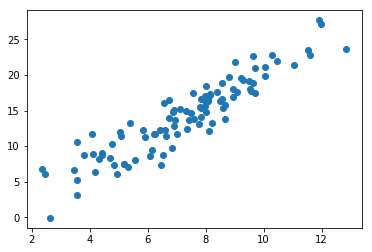

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# First we sample x
mu_x = 7
scale_x = 2
n = 100
x = np.random.normal(loc = mu_x,scale = scale_x,size = n)

# Then we sample y
scale_y = 2
y = np.random.normal(loc = x * 2,scale = scale_y)

# Finally we plot the points
plt.scatter(x,y)

We now have completed the first task : having a dataset of $(x_i,y_i)$

Now we will create a model to predict $y$ given $x$.

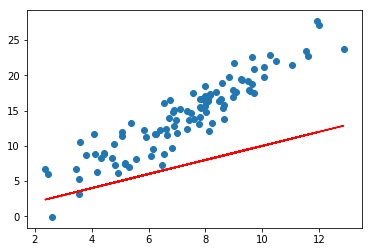

In [2]:
# Linear prediction
def predict(x,a,b):
    return x * a + b


# We first set them arbritarily
a = 1
b = 0

# Then we predict with the random values
pred = predict(x,a,b)

# Finally we plot our points and the first model estimate
plt.plot(x,pred,c= "r")
plt.scatter(x,y)

In [3]:
def l2_loss(y,pred):
    # Mean squared error
    l = (y - pred) ** 2
    l = np.mean(l) / 2
    
    return l

In [4]:
def grad(x,y,pred):
    # Gradient of the error with respect to a and b
    err = pred - y
    
    grad_a = np.dot(x,err) / n
    grad_b = np.sum(err) / n
    
    return grad_a, grad_b

In [5]:
def gradient_descent(a,b,grad_a,grad_b, alpha = 0.001):
    # Apply the gradient descent algorithm
    
    a = a - alpha * grad_a
    b = b - alpha * grad_b
    
    return a,b

In [6]:
n_epoch = 100

for i in range(n_epoch):
    pred = predict(x,a,b)
    
    loss = l2_loss(y,pred)
    
    grad_a, grad_b = grad(x,y,pred)
    
    a, b = gradient_descent(a,b,grad_a,grad_b)
    
    if i % 10 == 0:
        print(f"Loss at epoch {i} : {loss}")

Loss at epoch 0 : 29.698216337942252
Loss at epoch 10 : 10.372099124658009
Loss at epoch 20 : 4.62377259027937
Loss at epoch 30 : 2.9139006383827804
Loss at epoch 40 : 2.405190061229987
Loss at epoch 50 : 2.2537422197482853
Loss at epoch 60 : 2.208555591816721
Loss at epoch 70 : 2.194974571379529
Loss at epoch 80 : 2.1907942748149467
Loss at epoch 90 : 2.189410283458494


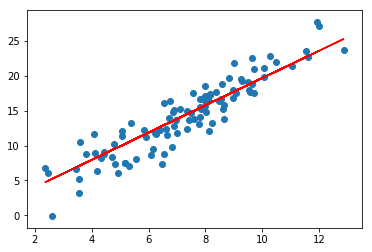

In [7]:
plt.plot(x,pred, c= "r")
plt.scatter(x,y)

## IV - Classification

### The theory

We saw how to perform regression, which is to predict a scalar value $y$ given $x$. Now we will focus on classification, which aims to predict the <strong>class $y$</strong> of an observation $x$. 

Therefore we have that $y$ can only takes a finite number of values, which we will be one of $K$ classes. Therefore $y$ takes values from $0,..., K-1$.

For now we will focus on binary classfication, which means $K=2$ and each observation can belong to two classes. 

With this framework we can still tackle most problems, such as cancer detection, with $y=1$ if the patient has a cancer, $y=0$ if not, given $x$ her medical record. 

### The Logistic regression

#### The model

To predict $y$ given $x$, the simplest model we can think of is the Logistic regression. The idea is simple, we want to have a linear function $f$ such that we can split our plan in 2. 

Now for the rest we will suppose that $x \in \mathbb{R}^2$ for simplicity. 

The first model we can think of, is to take a vector $w \in \mathbb{R}^2$, $b \in \mathbb{R}$, and compute $w . x + b$ with $.$ the scalar product.

THe idea is that if we want to split dataset with a linear boundary, we can take a vector which will serve as a baseline, here $w$ and compute the scalar product of observations. Because the scalar product is a function of the cosine of the angles of the two vectors it allows us to say on which half plan the observation belong with respect to the line defined by the vector.

We know that $w . x > 0 \iff \vec{w}.\vec{x} \in [-\frac{\pi}{2},\frac{\pi}{2}]$, i.e. the vectors are in the

$\hat{y} = \sigma (w . x + b)$

### The loss function

Here to assess the quality of our model, we will use the negative log-likelihood :

$L(y,\hat{y}) = - \sum_{i = 1}^{n} y_i log(\hat{y_i}) + (1 - y_i) log(1 - \hat{y_i})$

The intuition behind is that if $y = \hat{y}$ then $y_i log(\hat{y_i})$ and $(1 - y_i) log(1 - \hat{y_i})$ will be both equal to 0. But if $y = 1, \hat{y} \approx 0$ then $ - y log(\hat{y})$ will be close to $+ \infty$. Same goes for $(1 - y_i) log(1 - \hat{y_i})$ when $y = 0, \hat{y} \approx 1$. Therefore when the observed label is different from the predicted label, we will highly penalize the algorithm.

### Coding your first classifier

Now we will dive into the code !

First we will generate our data :

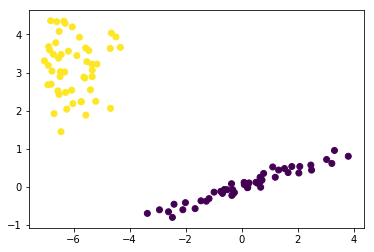

In [8]:
# Generate random sample, two components
n_samples = 50
np.random.seed(0)

C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# First samples are set to zeros,then 1
y = np.stack([np.zeros(n_samples),np.ones(n_samples)],axis=0)
y = y.reshape(n_samples*2)

# We plot it
plt.scatter(X[:,0],X[:,1],c=y.reshape(100))

Then we have to define the sigmoid function and also the forward pass :

In [9]:
def sigmoid(x):
    # Sigmoid function
    output = 1 / (1 + np.exp(-x))
    return output

In [10]:
def forward(X,W,b):
    # Forward pass with sigmoid activation
    output = np.dot(X,W) + b
    output = sigmoid(output)
    return output

Now we are going to randomly initialize our weights and plot the decision boundary for this first classifier

Text(0.5, 1.0, 'First classification of points')

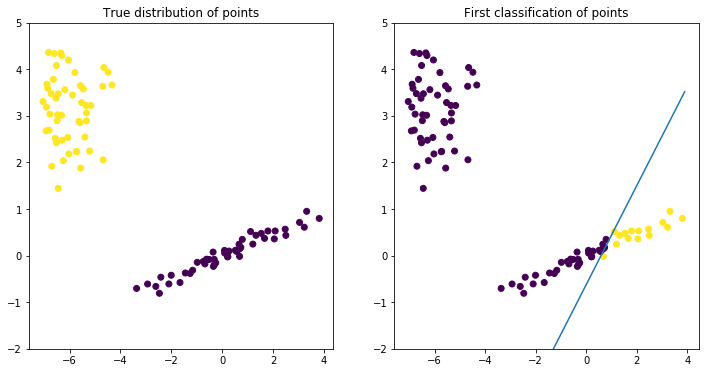

In [24]:
# Function to get the y coord from the x coord
def coord_y(x,W,b):
    y = (-b - W[0] * x) / W[1]
    return(y)

# We initialize randomly our parameters
W = np.random.randn(2,1)
b = np.random.randn(1)

# We get the label by assigning 1 to those with probability > 0.5
label = (forward(X,W,b) > 0.5).reshape(-1).astype(int)

# We get points to plot the decision boundary
x = np.arange(-6,4,0.1)
y_x = coord_y(x,W,b)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize = (12,6))
ax = ax.flatten()

ax[0].scatter(X[:,0],X[:,1],c=y)
ax[0].set_ylim(-2,5)
ax[0].set_title("True distribution of points")

# We plot the scatter and the line
ax[1].scatter(X[:,0],X[:,1],c=label)
ax[1].plot(x,y_x)
ax[1].set_ylim(-2,5)
ax[1].set_title("First classification of points")

Now we will code the functions necessary to train our model : the loss and the gradient descent.

In [25]:
def cross_entropy(y,y_pred):
    # Cross entropy error
    
    # We reshape y first from (n,) to (n,1)
    y = y.reshape(len(y),1)
    
    # We compute the cross entropy
    left = y * np.log(y_pred)
    right = (1-y) * np.log(1 - y_pred)
    loss = -(left + right)
    loss = loss.mean()
    
    return(loss)

In [26]:
def grad_cross_entropy(x,y,y_pred):
    # We get the gradient 
    
    y = y.reshape(len(y),1)
    
    # Gradient for the weight
    grad = -(y - y_pred) * x
    grad = np.mean(grad,axis=0,keepdims=1)
    
    # Gradient for the bias
    grad_b = -(y - y_pred)
    grad_b = np.mean(grad_b)
    
    return(grad,grad_b)

In [27]:
def grad_descent(grad,grad_b,W,b,alpha):
    
    # We update our parameters
    W = W - alpha * grad.T
    b = b - alpha * grad_b
    return(W,b)

We will now train our model :

In [28]:
# We set the hyperparameters
n_epoch = 2000
alpha = 0.01

for i in range(n_epoch):
    
    # We predict the classes
    y_pred = forward(X,W,b)
    
    # We compute the loss
    loss = cross_entropy(y,y_pred)
    
    # We get the gradients and update our weights
    grad, grad_b = grad_cross_entropy(X,y,y_pred)
    W,b = grad_descent(grad,grad_b,W,b,alpha)
    
    if i % 100 == 0:
        print(f"Epoch {i} with loss : {loss}")

Epoch 0 with loss : 3.5522091859400127
Epoch 100 with loss : 0.3187119643825816
Epoch 200 with loss : 0.27335824304512246
Epoch 300 with loss : 0.24130479062707744
Epoch 400 with loss : 0.21487608517317253
Epoch 500 with loss : 0.19273459116053235
Epoch 600 with loss : 0.17405930380340692
Epoch 700 with loss : 0.15820576831175445
Epoch 800 with loss : 0.1446560125704686
Epoch 900 with loss : 0.13299470039350364
Epoch 1000 with loss : 0.12288948545678091
Epoch 1100 with loss : 0.11407424590627596
Epoch 1200 with loss : 0.1063352659059428
Epoch 1300 with loss : 0.09950015605036
Epoch 1400 with loss : 0.09342911599963909
Epoch 1500 with loss : 0.08800810438153418
Epoch 1600 with loss : 0.0831435188872153
Epoch 1700 with loss : 0.07875805357150922
Epoch 1800 with loss : 0.0747874663696754
Epoch 1900 with loss : 0.07117804805309456


Finally we can see how well our model performs : 

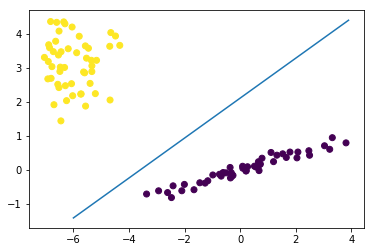

In [29]:
label = (forward(X,W,b) > 0.5).reshape(-1).astype(int)

x = np.arange(-6,4,0.1)
y_x = coord_y(x,W,b)

plt.scatter(X[:,0],X[:,1],c=label)
plt.plot(x,y_x)

## V - Real case study with Sklearn, Pandas and Flask

In real life, most of the standard Machine Learning algorithms are already coded and available in the library Scikit Learn, developped by the INRIA.

![Sklearn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/640px-Scikit_learn_logo_small.svg.png)

Here we will use Pandas for handling the data, Sklearn for creating our model, and Flask to create a simple HTTP webpage to share our results. Flask is a Python Framework to do backend programming for servers, it is quite easy to use and widely used.

In [33]:
import pandas as pd

# We first import our data
data = pd.read_csv("./data/ratWeight.csv")

# Then we can display the first 10 rows
data.head(10)

,id,week,weight,regime,gender,dosage
0,B38602,1,236.1,Control,Male,11%
1,B38602,2,282.6,Control,Male,11%
2,B38602,3,336.0,Control,Male,11%
3,B38602,4,376.8,Control,Male,11%
4,B38602,5,403.9,Control,Male,11%
5,B38602,6,414.3,Control,Male,11%
6,B38602,7,443.3,Control,Male,11%
7,B38602,8,460.4,Control,Male,11%
8,B38602,9,473.8,Control,Male,11%
9,B38602,10,493.8,Control,Male,11%


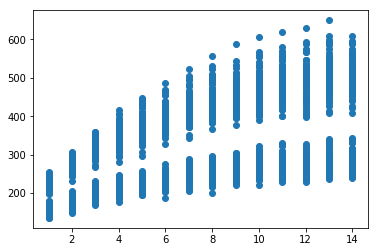

In [36]:
# We first extract the values 
x = data.week.values.reshape(-1,1)
y = data.weight.values.reshape(-1,1)

# We then plot it with matplotlib
plt.scatter(x,y)

Finally we use Sklearn to fit the model.

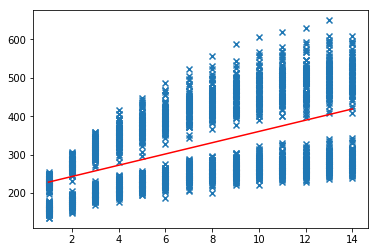

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.linear_model

# We select the model
model = sklearn.linear_model.LinearRegression()

# We fit our data with the model
model.fit(x,y)

# We get predictions
preds = model.predict(x)

# We plot our predictions
plt.scatter(x,y, marker ="x")
plt.plot(x,preds,c = "r")

Finally, once the Flask server is up and running, we request data to it.

In [1]:
import requests

url = "https://x-ai-regression.azurewebsites.net/rat_weight?week=3"

req = requests.get(url)

print(req.json())

Your rat at age 3 should weigh 257.46625160010836
